### Why Confidence Intervals?

- Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence. For example, we estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

- This is different than having a 95% probability that the true population proportion is within our confidence interval.

- Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

### Tasks :
- CI for one proportion
- CI comparing two independent proportion
- CI for one mean
- CI for difference b/w two means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('D:/DataScience/Statistics/Nhanes_2015_2016.csv')

In [3]:
print(df.shape)
df.head()

(5735, 28)


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## CI for One Proportion

- We will see how we make the CI for the proportion of people who smoke. In the data, It can be  found in column 'SMQ020'. 
- We will make the CI for proportion of smokers from both male and female. In the data, gender can be found in 'RIAGENDR'

In [4]:
df["SMQ020x"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

### To calculate CI, we need two things :
- sample proportion of smokers
- total sample size of entire sample

In [5]:
dx = df[["SMQ020x", "RIAGENDRx"]].dropna()  # dropna drops cases where either variable is missing
dz = dx.groupby(dx.RIAGENDRx).agg({'SMQ020x':[lambda x : np.mean(x=='Yes'),np.size]})
dz.columns = ["Proportion", "Total_n"]
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [6]:
def CIOneProportion(dz,gender):
    p = dz.Proportion[gender]
    n = dz.Total_n[gender]
    se = np.sqrt(p*(1-p)/n)
    lcb = p - 1.96 *  se
    ucb = p + 1.96 *  se
    return (lcb,ucb)

Calculate the 95% confidence intervals for 
- the proportions of female smokers 
- the proportions of male smokers 
- using the formula for the one-sample confidence interval for a proportion

In [7]:
CIOneProportion(dz,'Male')

(0.49458714955108174, 0.531929377873546)

In [8]:
CIOneProportion(dz,'Female')

(0.288294683866098, 0.32139576027925865)

In [9]:
df['agegrp'] = pd.cut(df.RIDAGEYR,[18,30,40,50,60,70,80])
# Calculate the smoking rates within age/gender groups
pr = df.groupby(['agegrp','RIAGENDRx']).agg({'SMQ020x':lambda x: np.mean(x=='Yes')}).unstack()
pr.columns = ['Female','Male']
# The number of people for each calculated proportion
dn = df.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]
# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

Text(0, 0.5, 'Female smoking proportion')

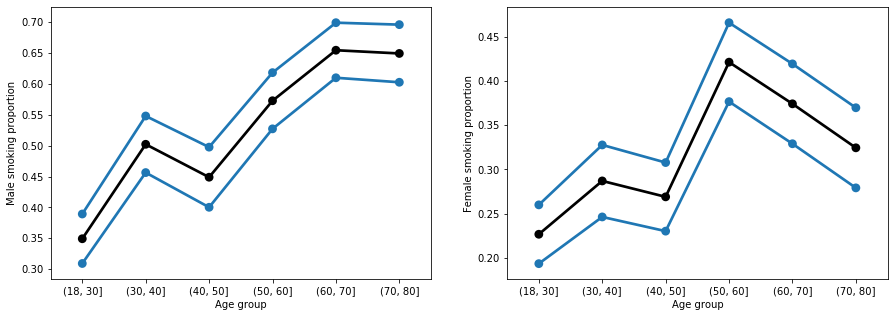

In [10]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x = np.arange(6)
pp = sns.pointplot(x,pr.Male.values,color='black')
sns.pointplot(x,pr.Male.values-1.96*se.Male.values)
sns.pointplot(x,pr.Male.values+1.96*se.Male.values)
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Male smoking proportion")
plt.subplot(1,2,2)
pp = sns.pointplot(x,pr.Female.values,color='black')
sns.pointplot(x,pr.Female.values-1.96*se.Female.values)
sns.pointplot(x,pr.Female.values+1.96*se.Female.values)
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female smoking proportion")

In [11]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [12]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906,906+2066)

(0.2882949879861214, 0.32139545615923526)

In [13]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413,1413+1340)

(0.49458749263718593, 0.5319290347874418)

## CI for Two independent Proportion

In [14]:
p_male = dz.Proportion.Male
n_male = dz.Total_n.Male
p_female = dz.Proportion.Female
n_female = dz.Total_n.Female

In [15]:
se_male = np.sqrt(p_male*(1-p_male)/n_male)
se_female = np.sqrt(p_female*(1-p_female)/n_female)
se_male,se_female

(0.009526078653689868, 0.008444152146214435)

In [16]:
se_diff = np.sqrt(se_male**2 + se_female**2)
se_diff

0.012729881381407434

In [17]:
d = p_female - p_male

In [18]:
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)

-0.2338728044024504 -0.18295327887682067


The 95% confidence interval above shows us that any value for the difference of population proportions (between females and males) lying between -0.233 and -0.183 is consistent with the observed data.

### CI for SubPopulation

Text(0, 0.5, 'Female - male smoking proportion')

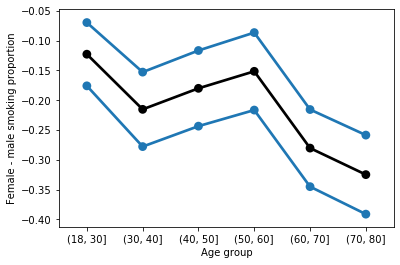

In [19]:
# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

Based on this plot, we see that in the United States, smoking is more common in men than in women, not just overall, but also in every one of the age bands.  The difference is largest for older people -- for people older than 60, the smoking rate for males is around 30 percentage points greater than the smoking rate for females, while for people younger than 30, the smoking rate for males is only around 15 percentage points greater than the smoking rate for females.

## Confidence Interval For Mean

Here, We discuss how to create CI for the mean. 
In the data, we calculate the mean BMI for all women and for all men in the NHANES sample.

### Distribution of BMI

In [58]:
male_bmi = df.loc[df.RIAGENDRx=='Male','BMXBMI']
female_bmi = df.loc[df.RIAGENDRx=='Female','BMXBMI']

Text(0.5, 0, 'BMI')

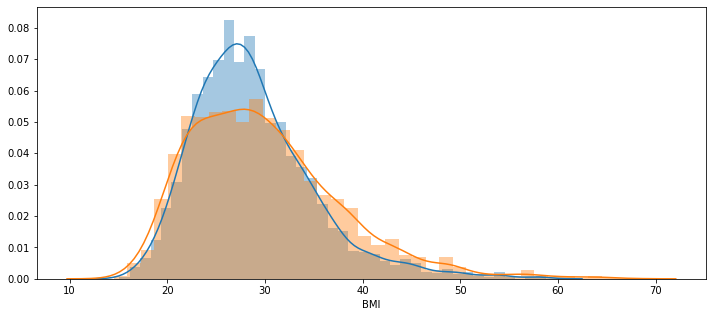

In [83]:
fig = plt.figure(figsize=(12,5))
h = sns.distplot(male_bmi)
sns.distplot(female_bmi)
h.set_xlabel('BMI')

In [79]:
dz = df.groupby(df.RIAGENDRx).agg({'BMXBMI':[np.mean,np.std,np.size]})
dz.columns = ['Mean','Std','Total']
dz

,Mean,Std,Total
RIAGENDRx,,,
Female,29.939946,7.753319,2976.0
Male,28.778072,6.252568,2759.0


In [21]:
dz.Mean.Female

29.939945652173996

In [22]:
def CIOnemean(dz,gender):
    mean = dz.Mean[gender]
    std = dz.Std[gender]
    se = std/np.sqrt(dz.Total[gender])
    lcb = mean - 1.96*se
    ucb = mean + 1.96*se
    return (lcb,ucb)

In [23]:
CIOnemean(dz,'Male')

(28.544759283689277, 29.011384940004692)

In [24]:
CIOnemean(dz,'Female')

(29.661380202535135, 30.218511101812858)

Below we show how the one-sample confidence interval can be calculated using Statsmodels.  The numbers differ slightly
due to rounding in the calculation above.  The result below is more exact.

In [25]:
female_bmi = df.loc[df.RIAGENDRx=='Female','BMXBMI'].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.65987549809015, 30.220015806257674)

In [26]:
male_bmi = df.loc[df.RIAGENDRx=='Male','BMXBMI'].dropna()
sm.stats.DescrStatsW(male_bmi).zconfint_mean()

(28.543010471866516, 29.013133751827375)

### One-sample CI for Sub-population 

In [27]:
pr = df.groupby(['agegrp','RIAGENDRx']).agg({'BMXBMI':[np.mean,np.std,np.size]}).unstack()
pr['BMXBMI','se','Female'] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr['BMXBMI','se','Male'] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

In [28]:
pr['BMXBMI','lcb','Male'] = pr['BMXBMI','mean','Male'] - pr['BMXBMI','std','Male']/pr['BMXBMI','se','Male']
pr['BMXBMI','ucb','Male'] = pr['BMXBMI','mean','Male'] + pr['BMXBMI','std','Male']/pr['BMXBMI','se','Male']
pr['BMXBMI','lcb','Female'] = pr['BMXBMI','mean','Female'] - pr['BMXBMI','std','Female']/pr['BMXBMI','se','Female']
pr['BMXBMI','ucb','Female'] = pr['BMXBMI','mean','Female'] + pr['BMXBMI','std','Female']/pr['BMXBMI','se','Female']

Text(0, 0.5, 'Female smoking proportion')

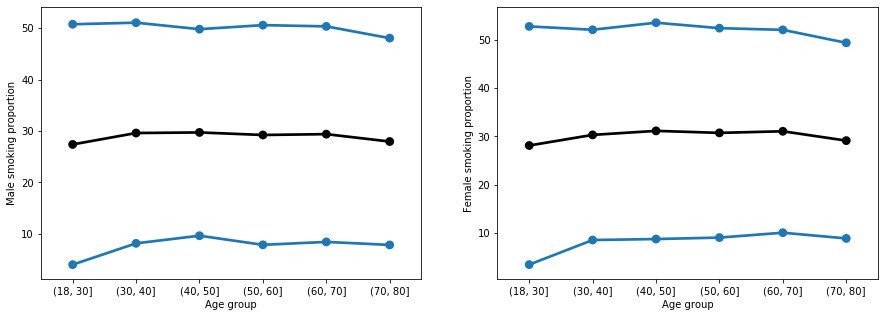

In [29]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x = np.arange(6)
pp = sns.pointplot(x,pr['BMXBMI','mean','Male'].values,color='black')
sns.pointplot(x,pr['BMXBMI','lcb','Male'].values-1.96*se.Male.values)
sns.pointplot(x,pr['BMXBMI','ucb','Male'].values+1.96*se.Male.values)
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Male smoking proportion")
plt.subplot(1,2,2)
pp = sns.pointplot(x,pr['BMXBMI','mean','Female'].values,color='black')
sns.pointplot(x,pr['BMXBMI','lcb','Female'].values-1.96*se.Female.values)
sns.pointplot(x,pr['BMXBMI','ucb','Female'].values+1.96*se.Female.values)
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female smoking proportion")

## CI For The Difference Between Two Means

In [30]:
p_male = dz.Mean.Male
n_male = dz.Total.Male
std_male = dz.Std.Male
p_female = dz.Mean.Female
n_female = dz.Total.Female
std_female = dz.Std.Female

In [31]:
se_male = std_male/np.sqrt(n_male)
se_female = std_female/np.sqrt(n_female)
se_male,se_female

(0.11903715722332033, 0.14212522940758335)

In [32]:
bmi_diff = p_female - p_male
se_diff = np.sqrt(se_female**2 + se_male**2)

In [33]:
lcb = bmi_diff - 2*se_diff
ucb = bmi_diff + 2*se_diff
lcb,ucb

(0.7910936830857225, 1.5326533975683005)

This finding indicates that while the point estimate shows that the women in our sample have around 1.1 unit greater BMI than the men in our sample, the true difference between the mean for all women in the population and for all men in the population could fall between 0.79 and 1.53, and still be consistent with the observed data.

### Age-Stratified Confidence Interval :
Here, we will see the difference of mean of BMI values of male and female within age bands. We see below that the overall average difference of 1.1 units results from differences that are very different based on age. Specifically, the difference between female and male BMI is much smaller than 1.1 for younger people, and much larger than 1.1 for older people

In [34]:
mean_diff = pr['BMXBMI','mean','Female'] - pr['BMXBMI','mean','Male']
se_diff = np.sqrt(pr['BMXBMI','se','Female']**2 + pr['BMXBMI','se','Male']**2)

Text(0, 0.5, 'Female - male BMI difference')

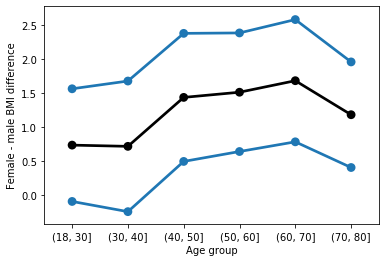

In [35]:
pp = sns.pointplot(x,mean_diff,color='black')
sns.pointplot(x,mean_diff-1.96*se_diff)
sns.pointplot(x,mean_diff+1.96*se_diff)
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

Since the confidence bands for people under 40 contain 0, the data are consistent with there being no difference between female and male BMI in this age range.  For people older than 40, a hypothetical zero difference between the mean BMI values for females and males is not very consistent with the data.  Informally, we can say that the data strongly suggest that the female mean BMI is greater than the male mean BMI in this age band, with the difference being anywhere from 0.5 to 2 units.

## Confidence Intervals and Sample Size
- Confidence intervals reflect the precision of an estimate, which is largely driven by the amount of data used to construct the estimate.
- Here, we calculate confidence intervals based on subsamples of size 100, 200, 400, and 800.
- A wider confidence interval implies that we have less precision in our estimate. 
- We calculate the average width of the confidence intervals constructed for each sample size. 
- We see that the confidence interval steadily becomes shorter as the sample size grows. 

In [36]:
dx = df.loc[df.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()

all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.0308970001949795
200 2.14922953437598
400 1.5215195239020218
800 1.0732781632770845


- It is also informative to plot the individual confidence intervals, computed for 500 subsamples of size 100, to see how they vary. 
- The vertical grey bars below each correspond to a confidence interval.  The red horizontal line is the mean BMI calculated using the entire data set, which can be taken as a proxy for othe population mean.  
- While the individual intervals are quite different from each other, it appears that the vast majority of them cover the population value.

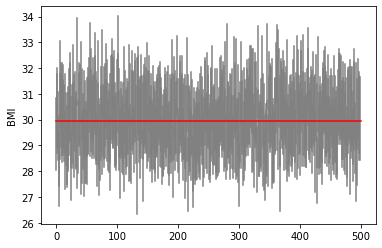

In [37]:
ci = all_cis[0]
for j, x in enumerate(ci):
    #print(x)
    plt.plot([j,j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0, 500], [mn, mn], color='red')

- We can calculate the fraction of the 500 simulated confidence intervals that did not cover the target value. This is called the "non-coverage probability". 
- There are two ways for an interval to fail to cover the target -- 
 (a) the upper limit of the interval can fall below the target,
 (b) the lower limit of the interval can fall above the target.  
- We calculate each of these below.  The sum of these two probabilities should be around 0.05, which is the allowed proportion of the time that a 95% confidence interval does not cover its target.

In [38]:
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

0.036
0.028
